In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [43]:
import torch
from torch import nn
from torchvision.transforms.functional import to_pil_image

In [4]:
import yolov1
from yolov1.config import parse_config

In [5]:
from yolov1.data.dataset import YOLODataset
from yolov1.utils.vis import draw_boxes, draw_box

## config

In [105]:
config_path = "../yolov1/src/yolov1/configs/default.yaml"

Reloading 'yolov1.data.augmentations'.
Reloading 'yolov1.utils.general'.
Reloading 'yolov1.data.dataset'.


In [106]:
config = parse_config(config_file=config_path)

config

YOLOConfig(data=DataConfig(root='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data', train='valid', val='valid', names=['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'], augmentations=AugmentationsConfig(horizontal_flip=1.0, vertical_flip=0.0, rotate=0.5, brightness_contrast=0.8, shift_scale_rotate=0.8, random_crop=0.8, random_crop_dims=(224.0, 224.0))), training=TrainingConfig(batch_size=4, num_workers=4, learning_rate=0.001, epochs=2, checkpoints_dir='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints', save_freq=10), inference=InferenceConfig(batch_size=2, checkpoint='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints/final_epoch_50.pt', source='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data/valid/images'), model=ModelConfig(backbone='resnet18', pretrained=True, backbone_output_channels=512, detector_hidden_sz=1024, input_size=(224, 224), conf_th=0.0, S=7, B=1, nc=5))

## dataset

In [118]:
train_ds = YOLODataset(config, mode="train")

Reloading 'yolov1.data.dataset'.
2024-05-06T14:56:28.681550Z [info     ] Loaded 250 samples             func_name=get_data lineno=64


In [123]:
len(train_ds[2])

torch.Size([3, 224, 224]) torch.Size([2, 5])


2

In [120]:
sample = train_ds[4]

torch.Size([3, 224, 224]) torch.Size([4, 5])


tensor([[4.0000, 0.8383, 0.6339, 0.3144, 0.7232],
        [4.0000, 0.3926, 0.6449, 0.7852, 0.7012],
        [4.0000, 0.5058, 0.5600, 0.6034, 0.4898],
        [4.0000, 0.2119, 0.3925, 0.4237, 0.7653]], dtype=torch.float64)


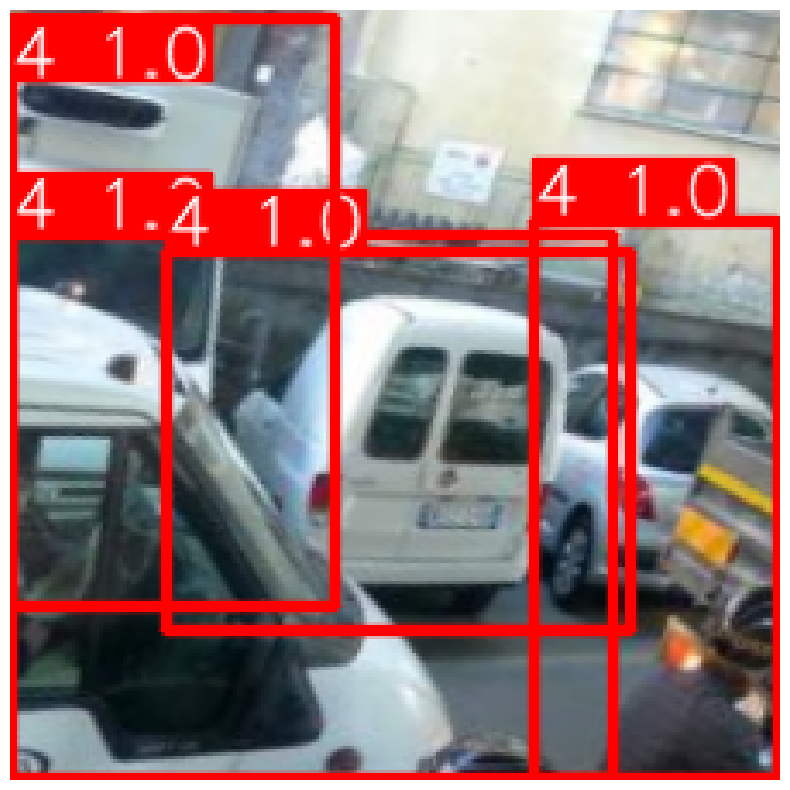

In [121]:
draw_boxes(to_pil_image(sample[0]), sample[1])

In [9]:
val_ds = YOLODataset(config, mode="val")

2024-05-05T06:33:06.848950Z [info     ] Loaded 250 samples             func_name=__init__ lineno=37


In [10]:
val_ds.encode = True

In [12]:
# draw_boxes(val_ds[3][0], val_ds[3][1])

## dataloader

In [124]:
train_dataloader = torch.utils.data.DataLoader(
        train_ds,
        batch_size=config.training.batch_size,
        shuffle=True,
        num_workers=config.training.num_workers,
    )
# val_dataloader = torch.utils.data.DataLoader(
#     val_ds,
#     batch_size=config.training.batch_size,
#     shuffle=False,
#     num_workers=config.training.num_workers
# )

Reloading 'yolov1.data.dataset'.


In [131]:
images.dtype

torch.uint8

In [130]:
labels.shape

torch.Size([4, 7, 7, 10])

## arch

In [14]:
# from yolov1.models.arch import YOLOv1

In [15]:
# model = YOLOv1(config.model)

## train

In [132]:
from yolov1.train import main

Reloading 'yolov1.data.dataset'.


In [133]:
main(config)

2024-05-06T15:02:43.328666Z [info     ] Loaded 250 samples             func_name=get_data lineno=64
Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-06T15:02:44.218408Z [info     ] Loaded model successfully      func_name=main lineno=45


/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.venv/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


2024-05-06T15:03:14.500195Z [info     ] Epoch [1/2], Train Loss: 190.7151 func_name=main lineno=55
2024-05-06T15:03:45.965479Z [info     ] Epoch [2/2], Train Loss: 45.8101 func_name=main lineno=55


## infer

In [10]:
from yolov1.detect import main as detect_main
from yolov1.data.dataset import InferenceDataset

In [11]:
for res in detect_main(config):
    break

Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-05T11:41:36.995735Z [info     ] Model loaded successfully      func_name=main lineno=104
2024-05-05T11:41:37.002259Z [info     ] Loaded 250 samples             func_name=__init__ lineno=39


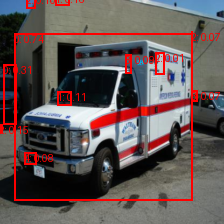

In [15]:
res[0]